In [1]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Предобработка

In [3]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [6]:
categ = ['neighbourhood_group', 'neighbourhood', 'room_type', 'host_name']

calculated_host_listings_count - represents total number of listings made by a specific host. (популярность хоста)

In [7]:
df['last_review'] = pd.to_datetime(df['last_review'], format='mixed', errors='coerce') 

In [8]:
df['last_review'].isna().sum() # нет отзывов

10052

In [9]:
df[df['last_review'].isna()]['number_of_reviews'].unique() # проверка

array([0], dtype=int64)

In [10]:
df['year'] = df['last_review'].dt.year.astype('Int32')
df['month'] = df['last_review'].dt.month.astype('Int32')
df['day'] = df['last_review'].dt.day.astype('Int32')

In [11]:
df['year'] = df['year'].fillna(0)
df['month'] = df['month'].fillna(0)
df['day'] = df['day'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [12]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,5,21
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,0,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,7,5
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19


In [13]:
df.drop(['host_id', 'last_review', 'id', 'name', 'host_name'], axis=1, inplace=True)

In [14]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10,19
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,5,21
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,0,0,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,7,5
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11,19


In [15]:
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)

In [16]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,room_type_Private room,room_type_Shared room
0,Brooklyn,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,2018,10,19,True,False
1,Manhattan,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,2019,5,21,False,False
2,Manhattan,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,0,0,0,True,False
3,Brooklyn,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,2019,7,5,False,False
4,Manhattan,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,2018,11,19,False,False


In [17]:
# меняем neighbourhood на частоту его появления 
df['neighbourhood'] = df.groupby('neighbourhood')['neighbourhood'].transform('count')
df.drop('neighbourhood', axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               48895 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
 9   year                            48895 non-null  Int32  
 10  month                           48895 non-null  Int32  
 11  day                             48895 non-null  Int32  
 12  room_type_Private room          

In [19]:
df.head()

,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,room_type_Private room,room_type_Shared room
0,Brooklyn,40.64749,-73.97237,149,1,9,0.21,6,365,2018,10,19,True,False
1,Manhattan,40.75362,-73.98377,225,1,45,0.38,2,355,2019,5,21,False,False
2,Manhattan,40.80902,-73.94190,150,3,0,0.00,1,365,0,0,0,True,False
3,Brooklyn,40.68514,-73.95976,89,1,270,4.64,1,194,2019,7,5,False,False
4,Manhattan,40.79851,-73.94399,80,10,9,0.10,1,0,2018,11,19,False,False


In [20]:
df.isna().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
year                              0
month                             0
day                               0
room_type_Private room            0
room_type_Shared room             0
dtype: int64

In [21]:
cont = [
    'reviews_per_month',
    'minimum_nights', 'number_of_reviews', 
    'calculated_host_listings_count', 'availability_365'
]

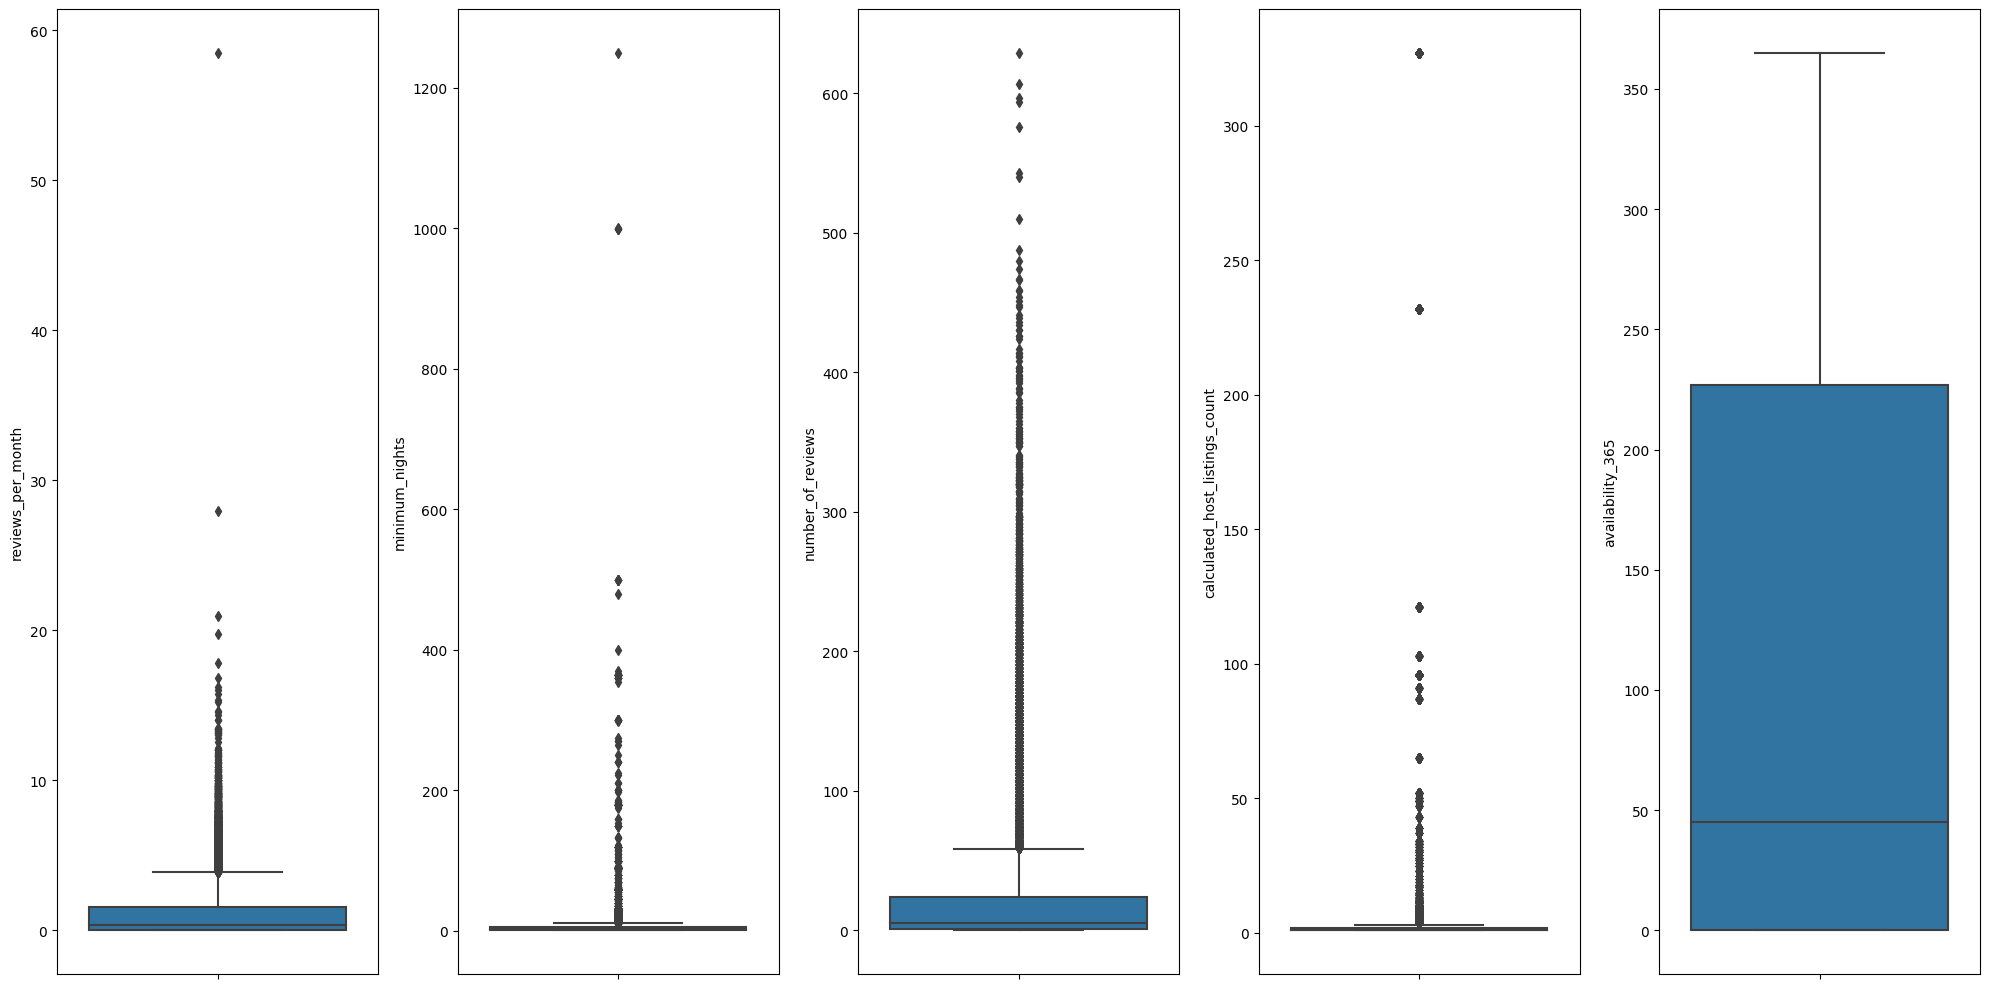

In [22]:
fig = plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax = fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

In [23]:
df[df['minimum_nights'] >= 365].shape[0]


43

In [24]:
suspicious = df[
    (df['minimum_nights'] >= 365) & 
    (df['availability_365'] < 365)  # квартира недоступна постоянно
]

In [25]:
suspicious

,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,room_type_Private room,room_type_Shared room
700,Manhattan,40.74618,-74.00392,195,365,10,0.12,1,0,2014,10,26,False,False
2854,Manhattan,40.71239,-74.01620,400,1000,0,0.00,1,362,0,0,0,False,False
3398,Manhattan,40.73858,-74.00875,500,365,0,0.00,1,0,0,0,0,True,False
3945,Manhattan,40.70781,-74.00701,130,365,6,0.10,1,262,2016,10,2,False,False
4372,Manhattan,40.83549,-73.94765,60,365,9,0.15,1,291,2019,6,15,False,False
4437,Manhattan,40.74873,-73.99557,93,365,10,0.17,19,97,2018,2,12,False,False
4794,Brooklyn,40.71852,-73.94165,240,365,0,0.00,1,363,0,0,0,False,False
7328,Manhattan,40.75755,-73.99305,99,365,7,0.14,1,337,2018,3,8,True,False
7355,Queens,40.75104,-73.93863,134,500,30,0.57,1,90,2018,6,24,False,False
8014,Manhattan,40.82135,-73.95521,75,500,0,0.00,1,362,0,0,0,False,False


In [26]:
df.drop(suspicious.index, axis=0, inplace=True)

In [27]:
df.head()

,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,room_type_Private room,room_type_Shared room
0,Brooklyn,40.64749,-73.97237,149,1,9,0.21,6,365,2018,10,19,True,False
1,Manhattan,40.75362,-73.98377,225,1,45,0.38,2,355,2019,5,21,False,False
2,Manhattan,40.80902,-73.94190,150,3,0,0.00,1,365,0,0,0,True,False
3,Brooklyn,40.68514,-73.95976,89,1,270,4.64,1,194,2019,7,5,False,False
4,Manhattan,40.79851,-73.94399,80,10,9,0.10,1,0,2018,11,19,False,False


In [28]:
from sklearn.preprocessing import QuantileTransformer

In [29]:
qt = QuantileTransformer(n_quantiles=10, random_state=0) # гауссово распр чуть лучше, чем нормальное
df[cont] = qt.fit_transform(df[cont])

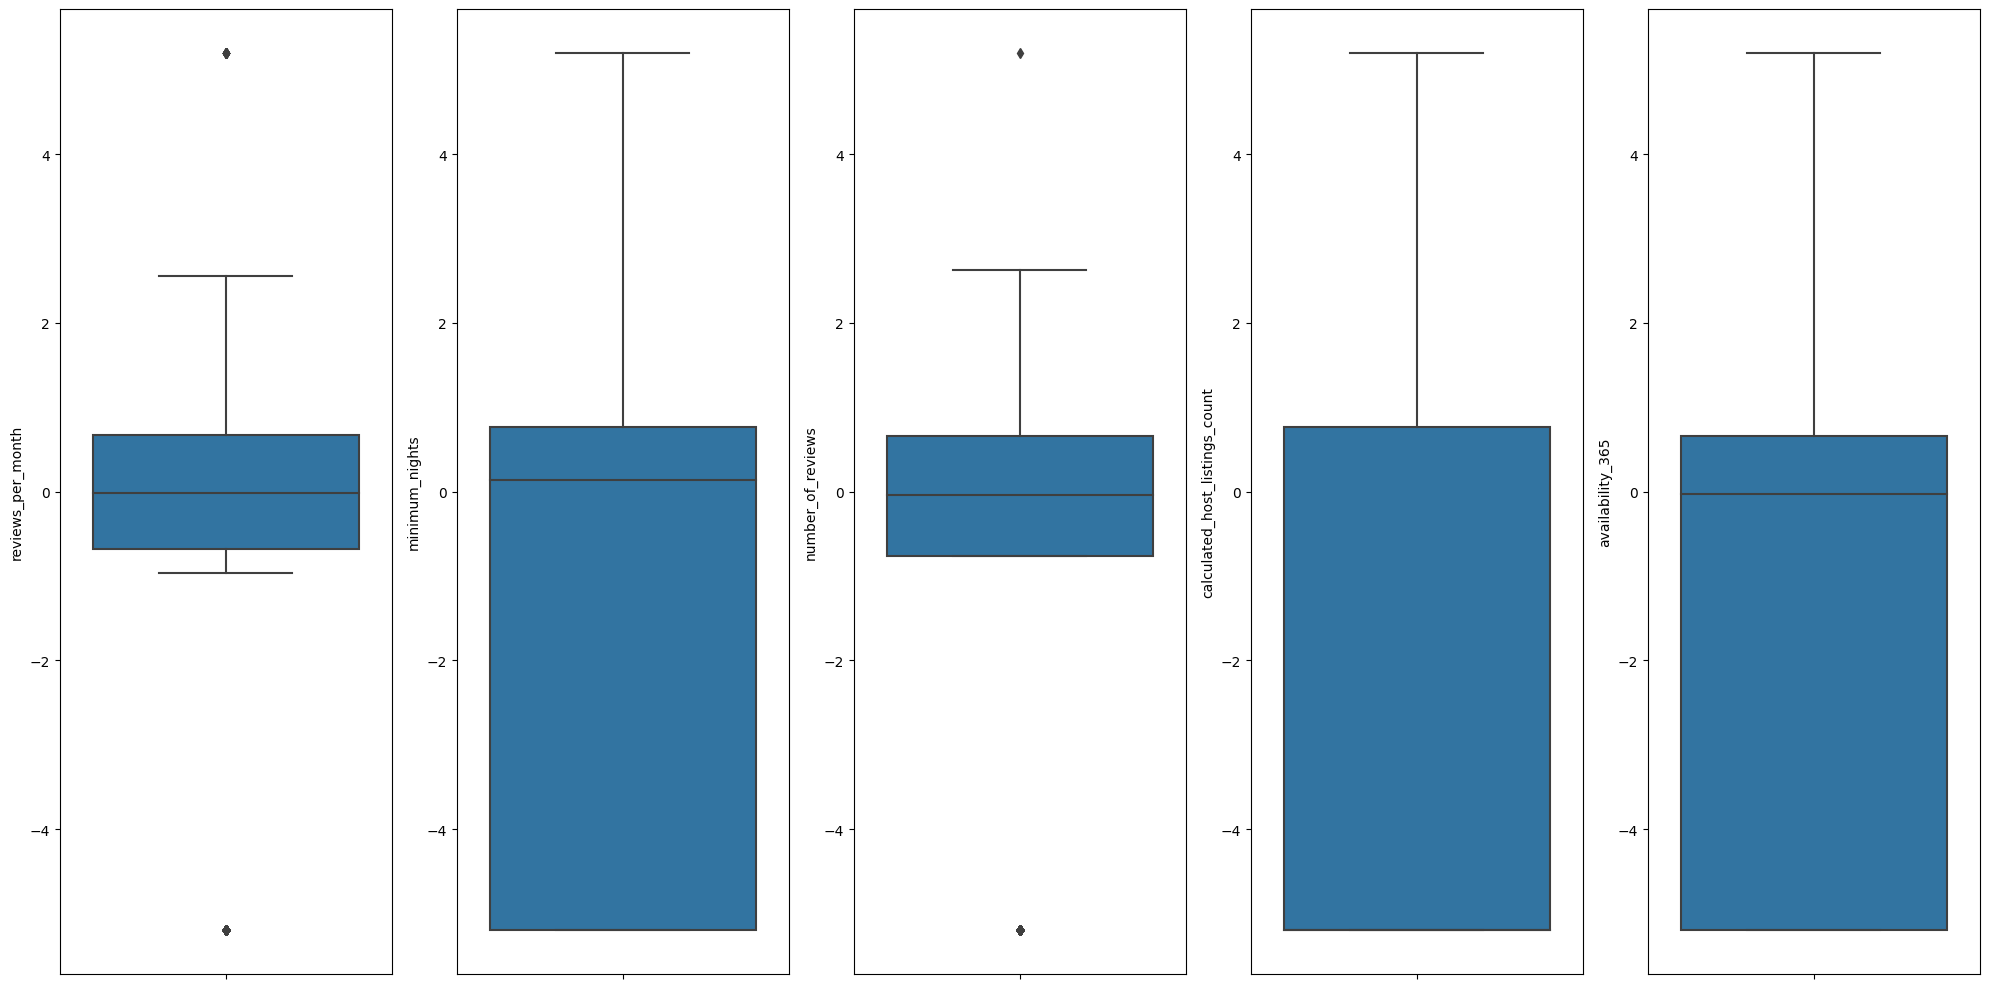

In [30]:
fig = plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax = fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

<Axes: xlabel='longitude', ylabel='latitude'>

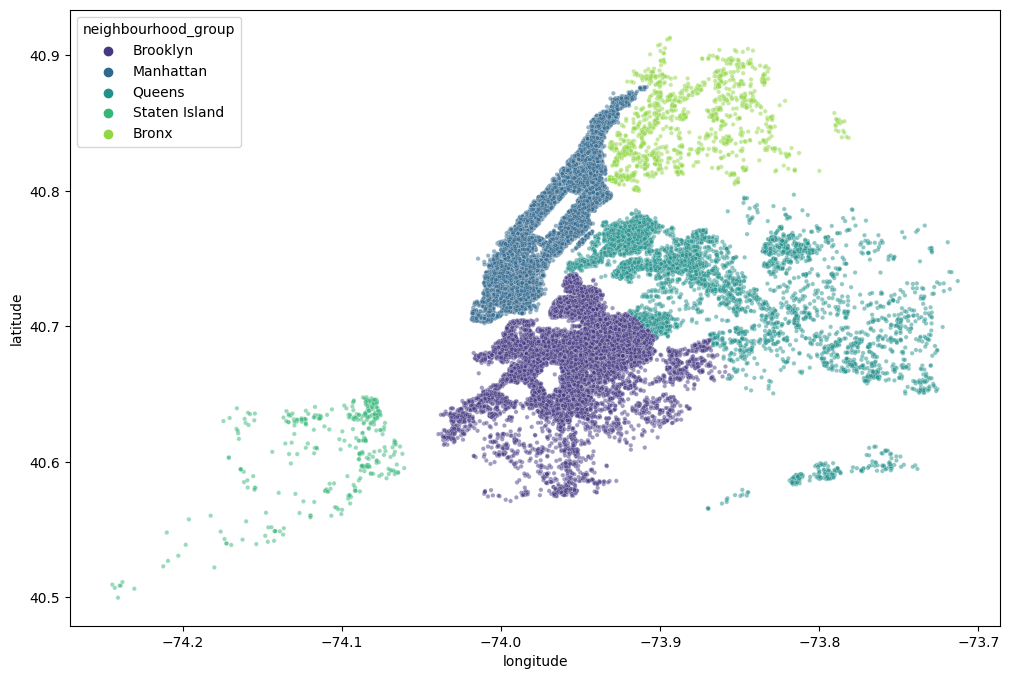

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    alpha=0.5,  
    s=10,       
    hue='neighbourhood_group',  
    palette='viridis'
)

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, random_state=42, n_init='auto')
df['geo_cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])

In [33]:
df.head()

,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,room_type_Private room,room_type_Shared room
0,Brooklyn,40.64749,-73.97237,149,-5.199338,0.220609,-0.220609,1.222464,5.199338,2018,10,19,True,False
1,Manhattan,40.75362,-73.98377,225,-5.199338,0.955141,-0.005158,0.764710,1.829398,2019,5,21,False,False
2,Manhattan,40.80902,-73.94190,150,0.139710,-5.199338,-5.199338,-5.199338,5.199338,0,0,0,True,False
3,Brooklyn,40.68514,-73.95976,89,-5.199338,1.471338,1.311227,-5.199338,0.545479,2019,7,5,False,False
4,Manhattan,40.79851,-73.94399,80,0.895780,0.220609,-0.464939,-5.199338,-5.199338,2018,11,19,False,False


plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    alpha=0.5,  
    s=10,       
    hue='geo_cluster',  
    palette='viridis'
)

In [34]:
df = pd.get_dummies(df, columns=['neighbourhood_group'], drop_first=True)

In [35]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,40.64749,-73.97237,149,-5.199338,0.220609,-0.220609,1.222464,5.199338,2018,10,19,True,False,True,False,False,False
1,40.75362,-73.98377,225,-5.199338,0.955141,-0.005158,0.764710,1.829398,2019,5,21,False,False,False,True,False,False
2,40.80902,-73.94190,150,0.139710,-5.199338,-5.199338,-5.199338,5.199338,0,0,0,True,False,False,True,False,False
3,40.68514,-73.95976,89,-5.199338,1.471338,1.311227,-5.199338,0.545479,2019,7,5,False,False,True,False,False,False
4,40.79851,-73.94399,80,0.895780,0.220609,-0.464939,-5.199338,-5.199338,2018,11,19,False,False,False,True,False,False


df.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [36]:
target = df['price']
df = df.drop(['price'],axis=1)
df.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,40.64749,-73.97237,-5.199338,0.220609,-0.220609,1.222464,5.199338,2018,10,19,True,False,True,False,False,False
1,40.75362,-73.98377,-5.199338,0.955141,-0.005158,0.764710,1.829398,2019,5,21,False,False,False,True,False,False
2,40.80902,-73.94190,0.139710,-5.199338,-5.199338,-5.199338,5.199338,0,0,0,True,False,False,True,False,False
3,40.68514,-73.95976,-5.199338,1.471338,1.311227,-5.199338,0.545479,2019,7,5,False,False,True,False,False,False
4,40.79851,-73.94399,0.895780,0.220609,-0.464939,-5.199338,-5.199338,2018,11,19,False,False,False,True,False,False


<Axes: >

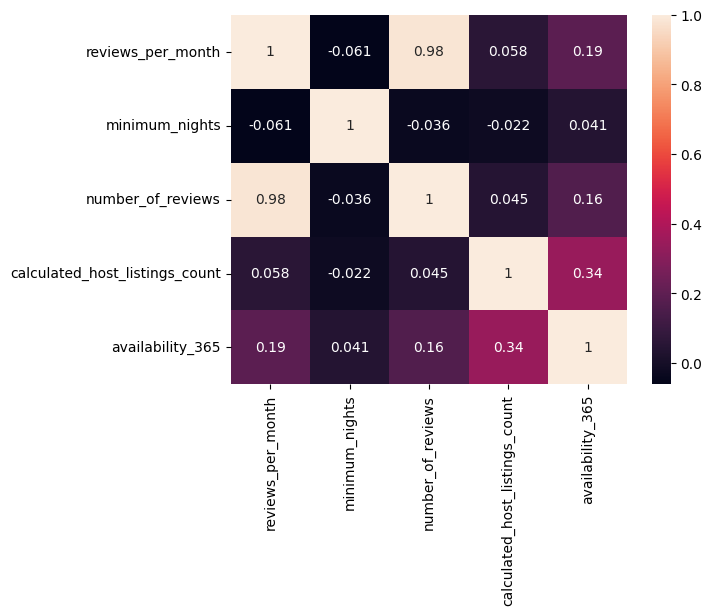

In [37]:
corr = df[cont].corr()
sns.heatmap(corr, annot=True)

C:\Users\papul.DESKTOP-U29R0P8.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Распределение цены')

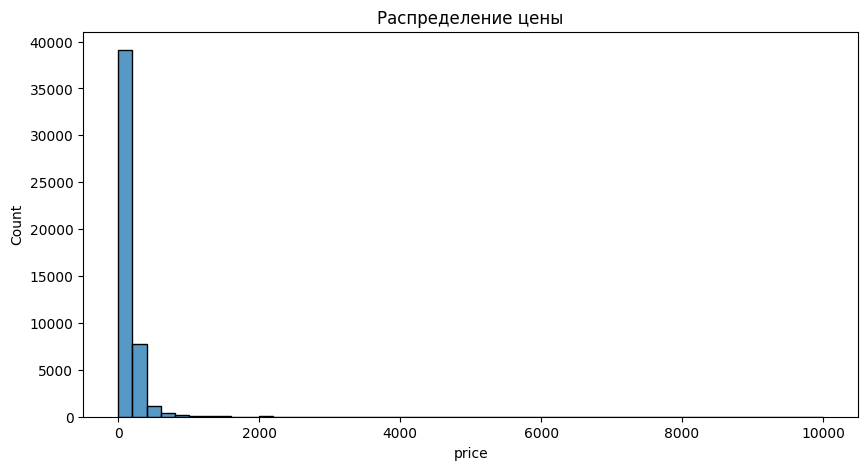

In [66]:
plt.figure(figsize=(10, 5))
sns.histplot(target, bins=50)
plt.title('Распределение цены')

In [38]:
df = df.drop(columns=['reviews_per_month']) 

In [39]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Линейная регрессия с регуляризацией L2

In [41]:
from sklearn import linear_model

In [63]:
alphas = np.logspace(1, 2, 100)  # 100 значений в логарифмической шкале
reg_ridge = linear_model.RidgeCV(alphas=alphas, cv=10)

In [48]:
reg_ridge = linear_model.RidgeCV()

In [64]:
reg_ridge.fit(X_train, y_train);

C:\Users\papul.DESKTOP-U29R0P8.000\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.23618e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\papul.DESKTOP-U29R0P8.000\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.22268e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\papul.DESKTOP-U29R0P8.000\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.2335e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\papul.DESKTOP-U29R0P8.000\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.23052e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True)

In [65]:
reg_ridge.score(X_test, y_test)

0.1300095687559989

In [67]:
reg_ridge.alpha_

10.0

In [75]:
reg_ridge.coef_

array([-1.63401169e+02, -3.17271912e+02, -4.50693464e+00, -2.00397968e+01,
       -8.29172313e-01,  9.05711937e+00,  2.69399136e-02,  6.44559085e-01,
       -2.30371863e-01, -1.11001236e+02, -1.53760483e+02, -1.03450184e+01,
        4.82786293e+01, -2.94355011e+00, -8.97786026e+01], dtype=float32)

In [76]:
reg_ridge.intercept_

-16676.576

Предполагается нелинейная зависимость 

# Линейная регрессия с регуляризацией L1

In [69]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
model.score(X_train, y_train)

0.8707328874550117